In [7]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns
%matplotlib inline


In [31]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data,columns=iris.feature_names)
irisdf['target'] = iris.target
irisdf
#iris.data#irisdf['target']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
irisdf.head()
#print irisdf['target']
iris.target.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
print irisdf.describe()

def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)


In [ ]:
irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)


In [ ]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions

print float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf)


In [33]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print knn.predict(iris.data[:,2:])
print iris.target

print knn.score(iris.data[:,2:], iris.target)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


In [35]:
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [38]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

k = range(1, 100)# some *list of numbers*! Make this go to 100!
params = {'n_neighbors':k, 'weights':['uniform', 'distance'], 
         'metric':['minkowski', 'manhattan']}# Specify the parameter you're changing as a dictionary key
            # Specify the *list of numbers* as the dictionary value!

kf = cross_validation.KFold(len(irisdf), n_folds = 5)
gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
gs.grid_scores_

[mean: 0.92667, std: 0.06799, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.92667, std: 0.06799, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09752, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.92667, std: 0.06799, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'metric': 'minkowski', 'weights': 'uniform'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'metric': 'm

In [44]:
gs.grid_scores_[1::2][0:len(gs.grid_scores_[1::2])/2]

[mean: 0.92667, std: 0.06799, params: {'n_neighbors': 1, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.92667, std: 0.06799, params: {'n_neighbors': 2, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 3, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.90667, std: 0.09286, params: {'n_neighbors': 4, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 5, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.91333, std: 0.08327, params: {'n_neighbors': 6, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.92667, std: 0.07717, params: {'n_neighbors': 7, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.92000, std: 0.07483, params: {'n_neighbors': 8, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.92000, std: 0.09092, params: {'n_neighbors': 9, 'metric': 'minkowski', 'weights': 'distance'},
 mean: 0.92667, std: 0.08000, params: {'n_neighbors': 10, 'metri

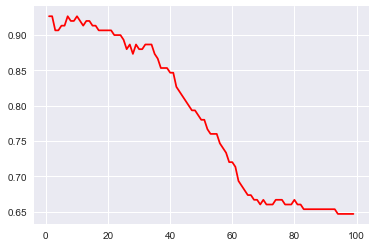

In [41]:
mink_dist, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2][0:len(gs.grid_scores_[1::2])/2]], color='red', label='mink_distance')
#mink_uni, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2][0:len(gs.grid_scores_[::2])/2]], color='blue', label = 'mink_uniform')
#man_dist, = plt.plot(k,[s[1] for s in  gs.grid_scores_[1::2][len(gs.grid_scores_[1::2])/2:]], color='green', label='manhattan_distance')
#man_uni, = plt.plot(k,[s[1] for s in  gs.grid_scores_[::2][len(gs.grid_scores_[::2])/2:]], color='purple', label = 'manhattan_uniform')
#plt.legend(handles=[mink_dist, mink_uni, man_dist, man_uni])
